In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
from keras.preprocessing.text import text_to_word_sequence
from nltk import WordNetLemmatizer

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [102]:
#import cleaned training data
train_df = pd.read_csv("../data/train_cleaned_new_column.csv")
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,final_toxicity
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,daw he matches this background colour im semin...,0,0,0,0,0,0,0
2,000113f07ec002fd,hey man im realy not trying to edit war its ju...,0,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cant make any real sugestions on impro...,0,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your v...,0,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer um theres no actual article for prosti...,0,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it loks like it was actualy you who put on...,0,0,0,0,0,0,0


In [103]:
test_df = pd.read_csv('../data/test_filtered.csv')
test_df

,id,comment_text
0,0001ea8717f6de06,Thank you for understanding. I think very high...
1,000247e83dcc1211,:Dear god this site is horrible.
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig..."
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ..."
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l..."
...,...,...
63973,fff8f64043129fa2,":Jerome, I see you never got around to this…! ..."
63974,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...
63975,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...
63976,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...


In [104]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()
train_df['sentiment'] = [sia.polarity_scores(x)['compound'] for x in train_df['comment_text']]
test_df['sentiment'] = [sia.polarity_scores(x)['compound'] for x in test_df['comment_text']]

In [105]:
#word count
train_df['word_count'] = train_df['comment_text'].apply(lambda x: len(str(x).split(" ")))
test_df['word_count'] = test_df['comment_text'].apply(lambda x: len(str(x).split(" ")))
#character count
train_df['char_count'] = train_df['comment_text'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
test_df['char_count'] = test_df['comment_text'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
#average word length
train_df['avg_word_length'] = train_df['char_count'] / train_df['word_count']
test_df['avg_word_length'] = test_df['char_count'] / test_df['word_count']


In [106]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,final_toxicity,sentiment,word_count,char_count,avg_word_length
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,0,0.5574,43,201,4.674419
1,000103f0d9cfb60f,daw he matches this background colour im semin...,0,0,0,0,0,0,0,0.2263,15,71,4.733333
2,000113f07ec002fd,hey man im realy not trying to edit war its ju...,0,0,0,0,0,0,0,-0.1779,42,183,4.357143
3,0001b41b1c6bb37e,more i cant make any real sugestions on impro...,0,0,0,0,0,0,0,0.5106,112,477,4.258929
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,0,0.6808,14,50,3.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your v...,0,0,0,0,0,0,0,0.2263,47,225,4.787234
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0,0,-0.4767,18,65,3.611111
159568,ffee36eab5c267c9,spitzer um theres no actual article for prosti...,0,0,0,0,0,0,0,-0.2960,11,62,5.636364
159569,fff125370e4aaaf3,and it loks like it was actualy you who put on...,0,0,0,0,0,0,0,0.3612,25,87,3.480000


In [107]:
test_df

,id,comment_text,sentiment,word_count,char_count,avg_word_length
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0.3612,16,81,5.062500
1,000247e83dcc1211,:Dear god this site is horrible.,0.0516,6,27,4.500000
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",-0.7393,78,371,4.756410
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0.0258,90,412,4.577778
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0.7184,60,275,4.583333
...,...,...,...,...,...,...
63973,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0.7803,108,489,4.527778
63974,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0.0000,15,167,11.133333
63975,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,-0.5684,15,68,4.533333
63976,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,-0.8126,27,111,4.111111


In [108]:
train = train_df.drop(columns = ['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','final_toxicity', 'comment_text'])
train

,sentiment,word_count,char_count,avg_word_length
0,0.5574,43,201,4.674419
1,0.2263,15,71,4.733333
2,-0.1779,42,183,4.357143
3,0.5106,112,477,4.258929
4,0.6808,14,50,3.571429
...,...,...,...,...
159566,0.2263,47,225,4.787234
159567,-0.4767,18,65,3.611111
159568,-0.2960,11,62,5.636364
159569,0.3612,25,87,3.480000


In [109]:
test = test_df.drop(columns = ['id', 'comment_text'])
test

,sentiment,word_count,char_count,avg_word_length
0,0.3612,16,81,5.062500
1,0.0516,6,27,4.500000
2,-0.7393,78,371,4.756410
3,0.0258,90,412,4.577778
4,0.7184,60,275,4.583333
...,...,...,...,...
63973,0.7803,108,489,4.527778
63974,0.0000,15,167,11.133333
63975,-0.5684,15,68,4.533333
63976,-0.8126,27,111,4.111111


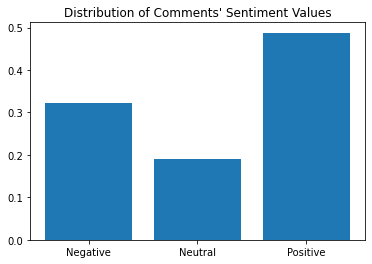

In [110]:
#Distribution of sentiment values
total = len(train)
sentiment_vals = [len(train[train['sentiment'] < 0])/total, len(train[train['sentiment'] == 0])/total, len(train[train['sentiment'] > 0])/total]
plt.bar(['Negative', 'Neutral', 'Positive'], height = sentiment_vals)
plt.title("Distribution of Comments' Sentiment Values")
plt.show()

In [111]:
x_train = train
y_train = train_df['final_toxicity']
X_train, X_val, Y_train, Y_val = train_test_split(x_train,y_train, random_state=42)

clf =GradientBoostingClassifier(learning_rate=0.05, max_depth=8, max_features=0.3, 
min_samples_leaf=100, n_estimators=500, random_state = 42)
clf.fit(X_train,Y_train)

print('Accuracy on training---')
print(clf.score(X_val,Y_val))

Accuracy on training---
0.9142456069987216


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000, activation = 'logistic', solver='adam', learning_rate_init=0.0001, random_state = 42)  
#clf = RandomForestClassifier(n_estimators = 500, bootstrap = True, random_state = 42)  

forest =  RandomForestClassifier(criterion='gini', n_estimators=1750, max_depth=8, min_samples_split=6, min_samples_leaf=5, max_features='auto', random_state=42) 

In [112]:
# from sklearn.ensemble import VotingClassifier
# ensemble=VotingClassifier(estimators=[('Gradient Boost', clf), ('MLP Classifier', mlp)],
#                        voting='hard', weights=[1,1]).fit(X_train,Y_train)
# print('Accuracy:',ensemble.score(X_val,Y_val))

Accuracy: 0.9132679918782743


In [113]:
#prediction on test set
y_pred = clf.predict(test)

In [114]:
#pd.DataFrame(y_pred).to_csv("Prediction.csv")

In [115]:
#actual y test values
test_labels = pd.read_csv('../data/test_labels_new_column.csv')
test_labels.drop(columns = ['id', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
y_test = test_labels['final_toxicity']
y_test

0        0
1        0
2        0
3        0
4        0
        ..
63973    0
63974    0
63975    0
63976    1
63977    0
Name: final_toxicity, Length: 63978, dtype: int64

In [116]:
accuracy_score(y_test, y_pred)

0.9097502266404076

In [117]:
f1_score(y_test, y_pred)

0.4164139882757227

In [118]:
precision_score(y_test, y_pred)

0.5642289783620926

In [119]:
recall_score(y_test, y_pred)

0.3299695659138235